## Unsupervised Learning - Clustering ##

Steps:

1. Import important libraraies.

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

2. Apply K-Means Clustering (elbow method to determine K).

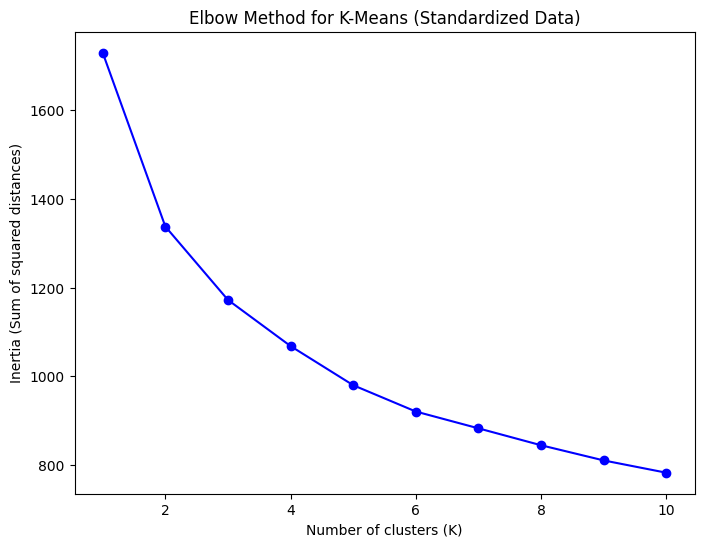

In [2]:
df = pd.read_csv("../data/heart_disease.csv")

X = df.drop("num", axis=1)

for col in ['cp_4', 'thal_7', 'exang']:
    X[col] = X[col].astype(int)

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.title('Elbow Method for K-Means (Standardized Data)')
plt.show()

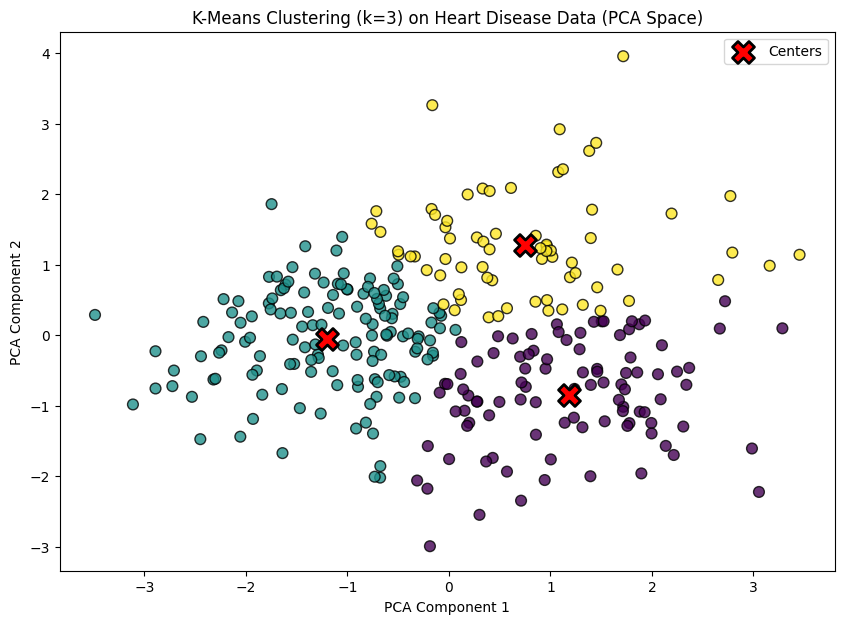

In [3]:
for col in ['cp_4', 'thal_7', 'exang']:
    X[col] = X[col].astype(int)

X_pca = PCA(n_components=2).fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=clusters, cmap="viridis",
    s=60, alpha=0.8, edgecolors="k"
)

centers = kmeans.cluster_centers_
plt.scatter(
    centers[:, 0], centers[:, 1],
    c="red", s=250, marker="X",
    edgecolors="k", linewidth=2,
    label="Centers"
)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering (k=3) on Heart Disease Data (PCA Space)")
plt.legend()
plt.show()

3. Perform Hierarchical Clustering (dendrogram analysis).

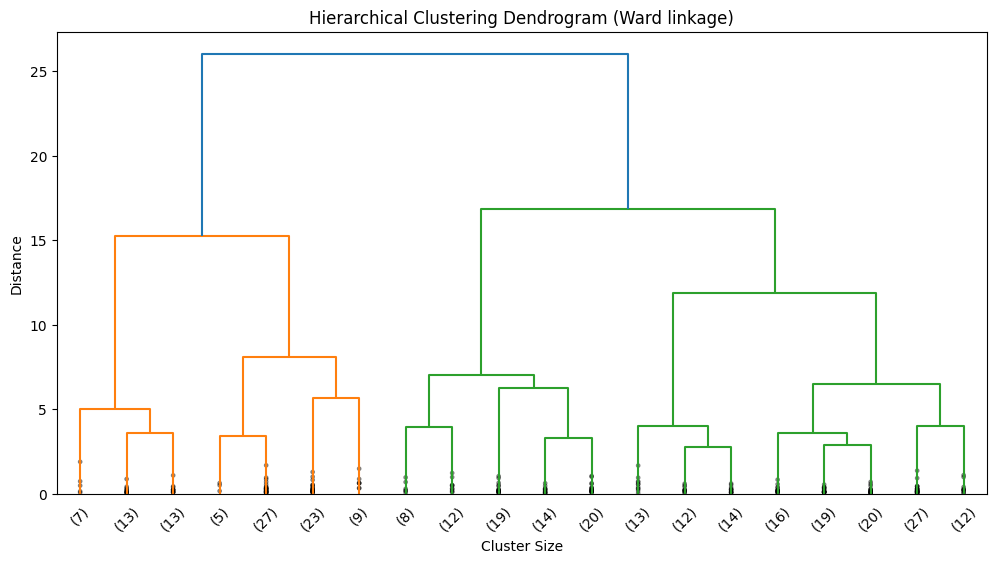

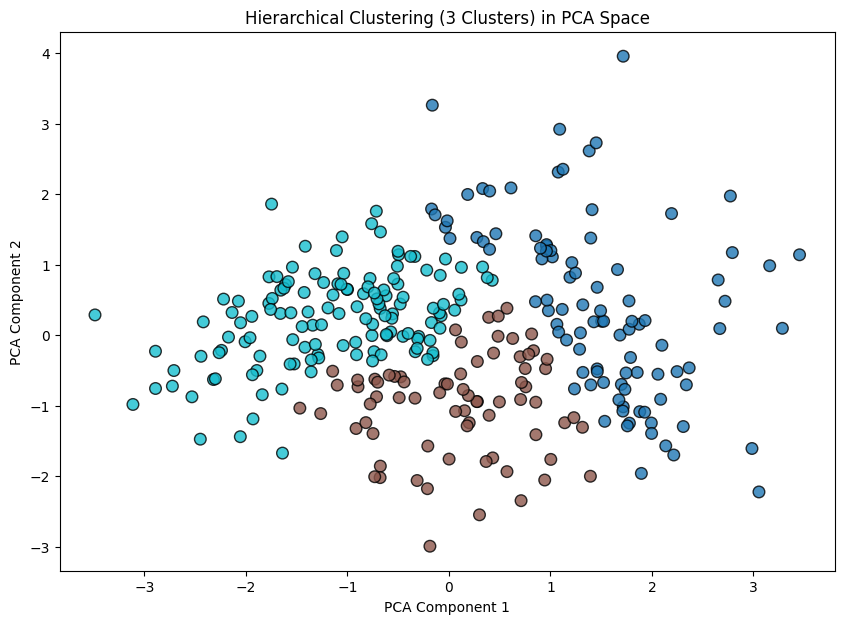

In [4]:
for col in ['cp_4', 'thal_7', 'exang']:
    X[col] = X[col].astype(int)

X_pca = PCA(n_components=2).fit_transform(X)

Z = linkage(X_pca, method="ward")

plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode="lastp", p=20, leaf_rotation=45, leaf_font_size=10, show_contracted=True)
plt.title("Hierarchical Clustering Dendrogram (Ward linkage)")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()

clusters = fcluster(Z, t=3, criterion="maxclust")

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap="tab10", s=70, alpha=0.8, edgecolors="k")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Hierarchical Clustering (3 Clusters) in PCA Space")
plt.show()


4. Compare clusters with actual disease labels.

K-Means Clusters vs Actual Labels:
 num              0   1
KMeansCluster         
0               22  74
1              109  29
2               33  36 

Hierarchical Clusters vs Actual Labels:
 num         0   1
HCluster         
1          27  70
2          31  42
3         106  27 



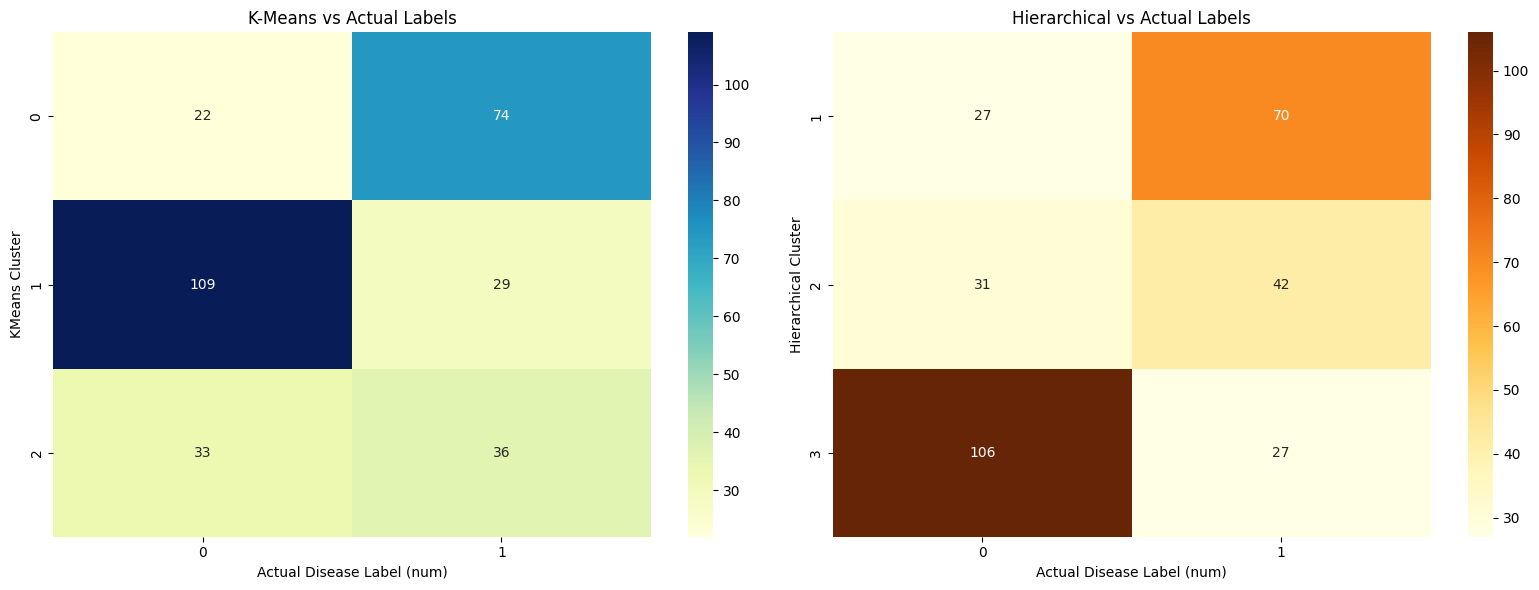

In [5]:
for col in ['cp_4', 'thal_7', 'exang']:
    X[col] = X[col].astype(int)

X_pca = PCA(n_components=2).fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
df["KMeansCluster"] = kmeans.fit_predict(X_pca)

Z = linkage(X_pca, method="ward")
df["HCluster"] = fcluster(Z, t=3, criterion="maxclust")

kmeans_comparison = pd.crosstab(df["KMeansCluster"], df["num"])
hclust_comparison = pd.crosstab(df["HCluster"], df["num"])

print("K-Means Clusters vs Actual Labels:\n", kmeans_comparison, "\n")
print("Hierarchical Clusters vs Actual Labels:\n", hclust_comparison, "\n")

# --- Visualization: Heatmaps ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(kmeans_comparison, annot=True, fmt="d", cmap="YlGnBu", ax=axes[0])
axes[0].set_title("K-Means vs Actual Labels")
axes[0].set_xlabel("Actual Disease Label (num)")
axes[0].set_ylabel("KMeans Cluster")

sns.heatmap(hclust_comparison, annot=True, fmt="d", cmap="YlOrBr", ax=axes[1])
axes[1].set_title("Hierarchical vs Actual Labels")
axes[1].set_xlabel("Actual Disease Label (num)")
axes[1].set_ylabel("Hierarchical Cluster")

plt.tight_layout()
plt.show()